#Question 1 - Sum of All Subset XOR Totals

The XOR total of an array is defined as the bitwise XOR of all its elements, or 0 if the array is empty.

For example, the XOR total of the array [2,5,6] is 2 XOR 5 XOR 6 = 1.
Given an array nums, return the sum of all XOR totals for every subset of nums.

Note: Subsets with the same elements should be counted multiple times.

An array a is a subset of an array b if a can be obtained from b by deleting some (possibly zero) elements of b.


\
**Example 1:**

Input: nums = [1,3]

Output: 6

Explanation: The 4 subsets of [1,3] are:
- The empty subset has an XOR total of 0.
- [1] has an XOR total of 1.
- [3] has an XOR total of 3.
- [1,3] has an XOR total of 1 XOR 3 = 2.

0 + 1 + 3 + 2 = 6

\
**Example 2:**

Input: nums = [5,1,6]

Output: 28

Explanation: The 8 subsets of [5,1,6] are:
- The empty subset has an XOR total of 0.
- [5] has an XOR total of 5.
- [1] has an XOR total of 1.
- [6] has an XOR total of 6.
- [5,1] has an XOR total of 5 XOR 1 = 4.
- [5,6] has an XOR total of 5 XOR 6 = 3.
- [1,6] has an XOR total of 1 XOR 6 = 7.
- [5,1,6] has an XOR total of 5 XOR 1 XOR 6 = 2.

0 + 5 + 1 + 6 + 4 + 3 + 7 + 2 = 28

\
**Example 3:**

Input: nums = [3,4,5,6,7,8]

Output: 480

Explanation: The sum of all XOR totals for every subset is 480.

\
**Constraints:**

1 <= nums.length <= 12

1 <= nums[i] <= 20

In [ ]:
def subsetXORSum(nums):
    # We will generate all subsets using the binary numbers from 0 to 2^n - 1
    n = len(nums)
    total_sum = 0

    # There are 2^n subsets, iterate over each subset represented by a number from 0 to (2^n - 1)
    for subset_mask in range(1 << n):  # 1 << n is equivalent to 2^n
        subset_xor = 0
        # Iterate through each element of nums to check if it's included in the subset
        for i in range(n):
            if subset_mask & (1 << i):  # Check if the i-th bit is 1 (element nums[i] is included)
                subset_xor ^= nums[i]
        # Add the XOR of this subset to the total sum
        total_sum += subset_xor

    return total_sum

#Question 2 - Lowest Common Ancestor of a Binary Search Tree

Given a binary search tree (BST), find the lowest common ancestor (LCA) node of two given nodes in the BST.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”


\
**Example 1:**

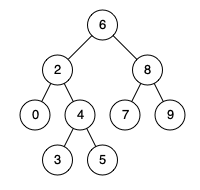

Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8

Output: 6

Explanation: The LCA of nodes 2 and 8 is 6.

\
**Example 2:**

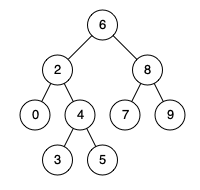

Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 4

Output: 2

Explanation: The LCA of nodes 2 and 4 is 2, since a node can be a descendant of itself according to the LCA definition.

\
**Example 3:**

Input: root = [2,1], p = 2, q = 1

Output: 2

\
**Constraints:**

The number of nodes in the tree is in the range [2, 105].

-109 <= Node.val <= 109

All Node.val are unique.

p != q

p and q will exist in the BST.

In [ ]:
from collections import deque

# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

# Solution class
class Solution(object):
    def lowestCommonAncestor(self, root, p, q):
        while root:
            if p.val < root.val and q.val < root.val:
                root = root.left
            elif p.val > root.val and q.val > root.val:
                root = root.right
            else:
                return root

# Build BST from level-order list
def build_tree(values):
    if not values or values[0] is None:
        return None, {}
    root = TreeNode(values[0])
    queue = deque([root])
    i = 1
    val_to_node = {root.val: root}
    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            val_to_node[values[i]] = node.left
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            val_to_node[values[i]] = node.right
            queue.append(node.right)
        i += 1
    return root, val_to_node

# --- MAIN ---

# Input example: 6,2,8,0,4,7,9,null,null,3,5
raw_input = input("Enter BST as level-order list (comma-separated): ")
values = [int(x.strip()) if x.strip() != 'null' else None for x in raw_input.strip().split(",")]

p_val = int(input("Enter value of p: "))
q_val = int(input("Enter value of q: "))

root, val_to_node = build_tree(values)

p = val_to_node.get(p_val)
q = val_to_node.get(q_val)

if not p or not q:
    print("One or both nodes not found in the tree.")
else:
    sol = Solution()
    lca = sol.lowestCommonAncestor(root, p, q)
    print(f"LCA of {p_val} and {q_val} is: {lca.val}")

# Question 3 - Validate Binary Search Tree

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

The left subtree of a node contains only nodes with keys less than the node's key.
The right subtree of a node contains only nodes with keys greater than the node's key.
Both the left and right subtrees must also be binary search trees.

\
**Example 1:**

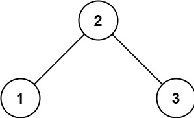

Input: root = [2,1,3]

Output: true

\
**Example 2:**

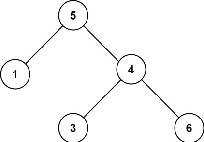

Input: root = [5,1,4,null,null,3,6]

Output: false

Explanation: The root node's value is 5 but its right child's value is 4.

\
**Constraints:**

The number of nodes in the tree is in the range [1, 104].

-231 <= Node.val <= 231 - 1

In [ ]:
from collections import deque

# TreeNode class
class TreeNode(object):
    def __init__(self, val=0):
        self.val = val
        self.left = None
        self.right = None

# Solution class
class Solution(object):
    def isValidBST(self, root):
        def helper(node, low, high):
            if not node:
                return True
            if not (low < node.val < high):
                return False
            return helper(node.left, low, node.val) and helper(node.right, node.val, high)
        return helper(root, float('-inf'), float('inf'))

# Function to build the tree from level-order list
def build_tree(values):
    if not values or values[0] is None:
        return None
    root = TreeNode(values[0])
    queue = deque([root])
    i = 1
    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1
    return root

# --- MAIN ---

# User Input
raw_input = input("Enter tree as level-order (comma-separated, use null for missing): ")
values = [int(x.strip()) if x.strip() != 'null' else None for x in raw_input.strip().split(",")]

# Build tree and validate BST
root = build_tree(values)
sol = Solution()
print("Is Valid BST?:", sol.isValidBST(root))

#Question 4 - Kth Smallest Element in a BST

Given the root of a binary search tree, and an integer k, return the kth smallest value (1-indexed) of all the values of the nodes in the tree.


\
**Example 1:**

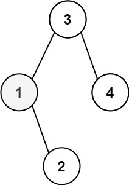

Input: root = [3,1,4,null,2], k = 1
Output: 1

\
**Example 2:**

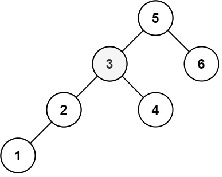

Input: root = [5,3,6,2,4,null,null,1], k = 3

Output: 3

\
**Constraints:**

The number of nodes in the tree is n.

1 <= k <= n <= 104

0 <= Node.val <= 104

In [ ]:
from collections import deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Build tree from list (level-order)
def build_tree(nodes):
    if not nodes or nodes[0] is None:
        return None

    root = TreeNode(nodes[0])
    queue = deque([root])
    i = 1
    while queue and i < len(nodes):
        node = queue.popleft()
        if i < len(nodes) and nodes[i] is not None:
            node.left = TreeNode(nodes[i])
            queue.append(node.left)
        i += 1
        if i < len(nodes) and nodes[i] is not None:
            node.right = TreeNode(nodes[i])
            queue.append(node.right)
        i += 1
    return root

# Find kth smallest using in-order traversal
class Solution:
    def kthSmallest(self, root, k):
        stack = []
        current = root
        while True:
            while current:
                stack.append(current)
                current = current.left
            current = stack.pop()
            k -= 1
            if k == 0:
                return current.val
            current = current.right

# ---- User Input Section ----
input_list = input("Enter the tree as a list (e.g. 3,1,4,null,2): ")
k = int(input("Enter k: "))

# Convert string to list
tree_values = [int(x) if x.strip() != "null" else None for x in input_list.split(",")]
root = build_tree(tree_values)

# Run solution
sol = Solution()
result = sol.kthSmallest(root, k)
print("Kth smallest element:", result)

#Question 5 - Convert Sorted List to Binary Search Tree

Given the head of a singly linked list where elements are sorted in ascending order, convert it to a height-balanced binary search tree.

\
**Example 1:**

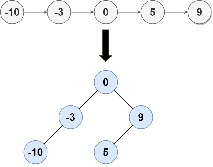

Input: head = [-10,-3,0,5,9]

Output: [0,-3,9,-10,null,5]

Explanation: One possible answer is [0,-3,9,-10,null,5], which represents the shown height balanced BST.

\
**Example 2:**

Input: head = []

Output: []

\
**Constraints:**

The number of nodes in head is in the range [0, 2 * 104].

-105 <= Node.val <= 105

In [ ]:
from collections import deque

# ListNode class for linked list
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# TreeNode class for binary tree
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Convert array to linked list
def list_to_linkedlist(arr):
    dummy = ListNode(0)
    current = dummy
    for val in arr:
        current.next = ListNode(val)
        current = current.next
    return dummy.next

# Convert sorted linked list to height-balanced BST
class Solution:
    def sortedListToBST(self, head):
        # Convert linked list to array
        vals = []
        while head:
            vals.append(head.val)
            head = head.next

        # Build BST from sorted array
        def build_tree(left, right):
            if left > right:
                return None
            mid = (left + right) // 2
            node = TreeNode(vals[mid])
            node.left = build_tree(left, mid - 1)
            node.right = build_tree(mid + 1, right)
            return node

        return build_tree(0, len(vals) - 1)

# Print BST in level order
def print_level_order(root):
    if not root:
        return []
    result = []
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node:
            result.append(node.val)
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append(None)
    # Trim trailing Nones
    while result and result[-1] is None:
        result.pop()
    return result

# -------- USER INPUT SECTION --------
user_input = input("Enter sorted list (comma-separated, e.g. -10,-3,0,5,9): ").strip()
if user_input == "":
    print("Output: []")
else:
    nums = [int(x) for x in user_input.split(",")]
    linked_list = list_to_linkedlist(nums)
    bst_root = Solution().sortedListToBST(linked_list)
    print("BST (level-order):", print_level_order(bst_root))

#Question 6 - Minimum Fuel Cost to Report to the Capital

There is a tree (i.e., a connected, undirected graph with no cycles) structure country network consisting of `n` cities numbered from `0 to n - 1 `and exactly `n - 1 `roads. The capital city is city 0. You are given a 2D integer array roads where `roads[i] = [ai, bi]` denotes that there exists a bidirectional road connecting cities ai and bi.

There is a meeting for the representatives of each city. The meeting is in the capital city.

There is a car in each city. You are given an integer seats that indicates the number of seats in each car.

A representative can use the car in their city to travel or change the car and ride with another representative. The cost of traveling between two cities is one liter of fuel.

Return the minimum number of liters of fuel to reach the capital city.


\
**Example 1:**

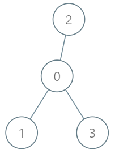

Input: roads = [[0,1],[0,2],[0,3]], seats = 5

Output: 3

Explanation:

- Representative1 goes directly to the capital with 1 liter of fuel.
- Representative2 goes directly to the capital with 1 liter of fuel.
- Representative3 goes directly to the capital with 1 liter of fuel.

It costs 3 liters of fuel at minimum.

It can be proven that 3 is the minimum number of liters of fuel needed.

\
**Example 2:**

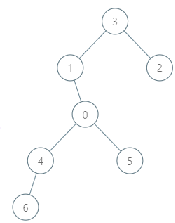

Input: roads = [[3,1],[3,2],[1,0],[0,4],[0,5],[4,6]], seats = 2

Output: 7

Explanation:
- Representative2 goes directly to city 3 with 1 liter of fuel.
- Representative2 and representative3 go together to city 1 with 1 liter of fuel.
- Representative2 and representative3 go together to the capital with 1 liter of fuel.
- Representative1 goes directly to the capital with 1 liter of fuel.
- Representative5 goes directly to the capital with 1 liter of fuel.
- Representative6 goes directly to city 4 with 1 liter of fuel.
- Representative4 and representative6 go together to the capital with 1 liter of fuel.

It costs 7 liters of fuel at minimum.

It can be proven that 7 is the minimum number of liters of fuel needed.

\
**Example 3:**

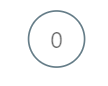

Input: roads = [], seats = 1

Output: 0

Explanation: No representatives need to travel to the capital city.


**Constraints:**

1 <= n <= 105

roads.length == n - 1

roads[i].length == 2

0 <= ai, bi < n

ai != bi

`roads` represents a valid tree.

1 <= seats <= 105

In [ ]:
from collections import defaultdict

# Function to compute minimum fuel cost
def minimumFuelCost(roads, seats):
    if not roads:
        return 0

    graph = defaultdict(list)
    for a, b in roads:
        graph[a].append(b)
        graph[b].append(a)

    fuel = [0]  # use list to mutate inside dfs

    def dfs(node, parent):
        people = 1  # one representative at each node
        for neighbor in graph[node]:
            if neighbor != parent:
                sub_people = dfs(neighbor, node)
                trips = (sub_people + seats - 1) // seats
                fuel[0] += trips
                people += sub_people
        return people

    dfs(0, -1)
    return fuel[0]

# -------- USER INPUT SECTION --------
road_input = input("Enter roads as comma-separated pairs (e.g. 0 1,0 2,0 3): ")
seats = int(input("Enter number of seats per car: "))

# Parse roads
roads = []
if road_input.strip():
    for pair in road_input.split(','):
        a, b = map(int, pair.strip().split())
        roads.append([a, b])

# Compute result
result = minimumFuelCost(roads, seats)
print("Minimum liters of fuel needed:", result)

#Question 7 - Number of Islands

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.


\
**Example 1:**

Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

Output: 1

\
**Example 2:**

Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

Output: 3

\
**Constraints:**

m == grid.length

n == grid[i].length

1 <= m, n <= 300

grid[i][j] is '0' or '1'.

In [ ]:
class Solution:
    def numIslands(self, grid):
        if not grid:
            return 0

        rows, cols = len(grid), len(grid[0])
        count = 0

        def dfs(r, c):
            if r < 0 or r >= rows or c < 0 or c >= cols or grid[r][c] == '0':
                return
            grid[r][c] = '0'
            dfs(r+1, c)
            dfs(r-1, c)
            dfs(r, c+1)
            dfs(r, c-1)

        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == '1':
                    count += 1
                    dfs(r, c)

        return count

# -------- USER INPUT SECTION --------
m = int(input("Enter number of rows: "))
n = int(input("Enter number of columns: "))

grid = []
print("Enter the grid row by row (only 0 or 1, no spaces):")
for _ in range(m):
    row = list(input().strip())
    grid.append(row)

sol = Solution()
print("Number of islands:", sol.numIslands(grid))

#Question 8 - Course Schedule

There are a total of `numCourses` courses you have to take, labeled from `0 to numCourses - 1`. You are given an array prerequisites where `prerequisites[i] = [ai, bi]` indicates that you must take course bi first if you want to take course `ai`.

For example, the pair `[0, 1]`, indicates that to take course `0` you have to first take course `1`.
Return `true` if you can finish all courses. Otherwise, return `false`.


\
**Example 1:**

Input: numCourses = 2, prerequisites = [[1,0]]

Output: true

Explanation: There are a total of 2 courses to take.
To take course 1 you should have finished course 0. So it is possible.

\
**Example 2:**

Input: numCourses = 2, prerequisites = [[1,0],[0,1]]

Output: false

Explanation: There are a total of 2 courses to take.

To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.

\
**Constraints:**

1 <= numCourses <= 2000

0 <= prerequisites.length <= 5000

prerequisites[i].length == 2

0 <= ai, bi < numCourses

All the pairs prerequisites[i] are unique.

In [ ]:
class Solution:
    def canFinish(self, numCourses, prerequisites):
        graph = [[] for _ in range(numCourses)]
        for a, b in prerequisites:
            graph[a].append(b)

        visited = [0] * numCourses  # 0 = unvisited, 1 = visiting, 2 = visited

        def dfs(course):
            if visited[course] == 1:
                return False
            if visited[course] == 2:
                return True
            visited[course] = 1
            for prereq in graph[course]:
                if not dfs(prereq):
                    return False
            visited[course] = 2
            return True

        for i in range(numCourses):
            if not dfs(i):
                return False
        return True

# -------- USER INPUT SECTION --------
numCourses = int(input("Enter the number of courses: "))
m = int(input("Enter the number of prerequisite pairs: "))

prerequisites = []
print("Enter each pair as: course prerequisite (separated by space)")
for _ in range(m):
    a, b = map(int, input().split())
    prerequisites.append([a, b])

sol = Solution()
result = sol.canFinish(numCourses, prerequisites)
print("Can finish all courses:" , result)